## Exploratory analysis of the dependend variables

In [59]:
import pandas as pd
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist

In [60]:
data_frame_combinado = pd.read_csv('../DataIntermediate/combined_data_dep_variables.csv', sep = ',')

data_frame_combinado.head()

,id,Degree_Rede_EntreajudaLabur,BetaCent_Rede_EntreajudaLabur,2Step_Rede_EntreajudaLabur,ARD_Rede_EntreajudaLabur,Closeness_Rede_EntreajudaLabur,Eigenvector_Rede_EntreajudaLabur,Between_Rede_EntreajudaLabur,2StepBet_Rede_EntreajudaLabur,Frag_Rede_EntreajudaLabur,...,OutARD_Var.Dep_RedePartilhaAgu,InARD_Var.Dep_RedePartilhaAgu,OutClose_Var.Dep_RedePartilhaAgu,InClose_Var.Dep_RedePartilhaAgu,Between_Var.Dep_RedePartilhaAgu,2StepBet_Var.Dep_RedePartilhaAgu,Frag_Var.Dep_RedePartilhaAgu,DwFrag_Var.Dep_RedePartilhaAgu,Ha_Total_Superf_NumZonas,N_Zonas_Superf_NumZonas
0,Aiace Quior,7,0.016946,7,7,251,0.000000,0,0,-0.000401,...,1.5,0.0,511,516,0,0,0.000050,0.000029,2.3644,7
1,Alamada Bia,2,0.003419,2,2,256,0.000000,0,0,-0.001006,...,0.0,0.0,516,516,0,0,-0.000071,-0.000061,0.5087,1
2,Alanghate Mfumba,10,0.032262,10,10,248,0.000000,0,0,-0.000037,...,0.0,0.0,516,516,0,0,-0.000071,-0.000061,1.4640,4
3,Albat Calabus,10,0.032262,10,10,248,0.000000,0,0,-0.000037,...,0.0,0.0,516,516,0,0,-0.000071,-0.000061,1.5186,2
4,Americano Mbunde,19,29.068657,19,19,239,0.223607,0,0,0.001053,...,0.0,0.0,516,516,0,0,-0.000071,-0.000061,0.2500,1


In [61]:
# Agrupar por 'id' y calcular la media (si es necesario)
data_frame_combinado_dep_grouped = data_frame_combinado.groupby('id').mean().reset_index()

# Eliminar la columna 'id' para realizar el PCA
data_for_pca = data_frame_combinado_dep_grouped.drop(columns=['id']).dropna()

data_frame_combinado_dep_grouped.dropna()


,id,Degree_Rede_EntreajudaLabur,BetaCent_Rede_EntreajudaLabur,2Step_Rede_EntreajudaLabur,ARD_Rede_EntreajudaLabur,Closeness_Rede_EntreajudaLabur,Eigenvector_Rede_EntreajudaLabur,Between_Rede_EntreajudaLabur,2StepBet_Rede_EntreajudaLabur,Frag_Rede_EntreajudaLabur,...,OutARD_Var.Dep_RedePartilhaAgu,InARD_Var.Dep_RedePartilhaAgu,OutClose_Var.Dep_RedePartilhaAgu,InClose_Var.Dep_RedePartilhaAgu,Between_Var.Dep_RedePartilhaAgu,2StepBet_Var.Dep_RedePartilhaAgu,Frag_Var.Dep_RedePartilhaAgu,DwFrag_Var.Dep_RedePartilhaAgu,Ha_Total_Superf_NumZonas,N_Zonas_Superf_NumZonas
0,Aiace Quior,7.0,0.016946,7.0,7.0,251.0,0.000000,0.0,0.0,-0.000401,...,1.5,0.000000,511.0,516.0,0.0,0.0,0.000050,0.000029,2.3644,7.0
1,Alamada Bia,2.0,0.003419,2.0,2.0,256.0,0.000000,0.0,0.0,-0.001006,...,0.0,0.000000,516.0,516.0,0.0,0.0,-0.000071,-0.000061,0.5087,1.0
2,Alanghate Mfumba,10.0,0.032262,10.0,10.0,248.0,0.000000,0.0,0.0,-0.000037,...,0.0,0.000000,516.0,516.0,0.0,0.0,-0.000071,-0.000061,1.4640,4.0
3,Albat Calabus,10.0,0.032262,10.0,10.0,248.0,0.000000,0.0,0.0,-0.000037,...,0.0,0.000000,516.0,516.0,0.0,0.0,-0.000071,-0.000061,1.5186,2.0
4,Americano Mbunde,19.0,29.068657,19.0,19.0,239.0,0.223607,0.0,0.0,0.001053,...,0.0,0.000000,516.0,516.0,0.0,0.0,-0.000071,-0.000061,0.2500,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Vieira Bedugle,9.0,0.026138,9.0,9.0,249.0,0.000000,0.0,0.0,-0.000158,...,0.0,2.000000,516.0,510.0,0.0,0.0,0.000050,0.000060,4.7238,12.0
126,Viriato Quintunda,12.0,0.049746,12.0,12.0,246.0,0.000000,0.0,0.0,0.000205,...,0.0,2.000000,516.0,510.0,0.0,0.0,0.000050,0.000060,5.3823,11.0
127,Wangna Ntchoba,15.0,0.108598,15.0,15.0,243.0,0.000000,0.0,0.0,0.000568,...,0.0,3.833333,516.0,504.0,0.0,0.0,0.000232,0.000171,2.9833,3.0
128,Wilndan Tchuda,9.0,0.026138,9.0,9.0,249.0,0.000000,0.0,0.0,-0.000158,...,2.0,1.000000,510.0,513.0,0.0,0.0,0.000111,0.000120,1.3262,3.0


        PC1       PC2                id
0 -3.283794 -0.276535       Aiace Quior
1 -3.806109  1.197589       Alamada Bia
2 -5.500013  0.022697  Alanghate Mfumba
3 -4.489902 -0.057925     Albat Calabus
4 -6.175526  0.443472  Americano Mbunde


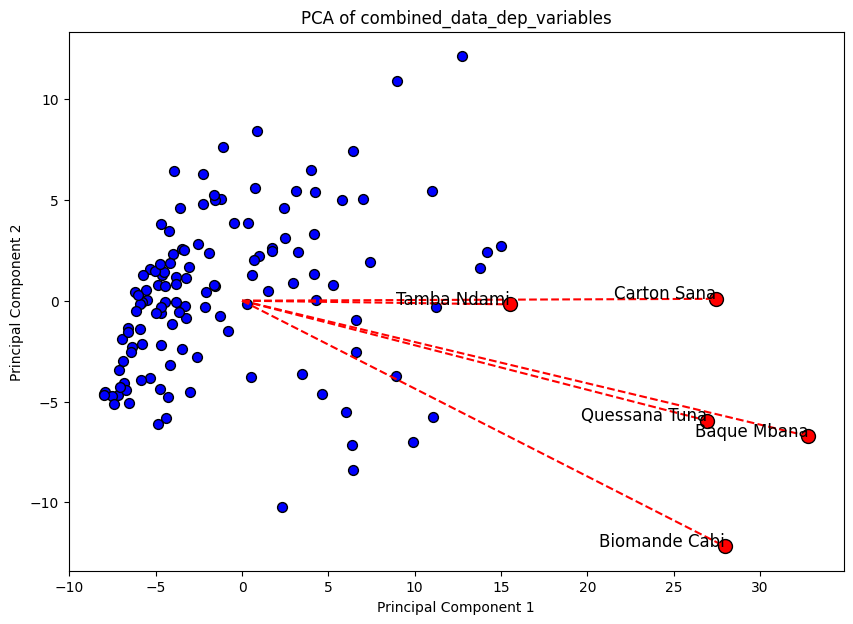

In [62]:
# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_pca)

# Realizar el PCA
pca = PCA(n_components=2)  # Cambia n_components según tus necesidades
principal_components = pca.fit_transform(data_scaled)

# Crear un DataFrame con los componentes principales
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['id'] = data_frame_combinado_dep_grouped['id']

# Mostrar las primeras filas del DataFrame de componentes principales
print(principal_df.head())

# Seleccionar los IDs más relevantes (por ejemplo, los 5 valores absolutos más altos de PC1). OJO: si quiere explorar más debes cambiar este valor. 
top_n = 5
top_ids = principal_df.nlargest(top_n, 'PC1')['id']

# Graficar los componentes principales
plt.figure(figsize=(10, 7))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c='blue', edgecolor='k', s=50)

# Añadir las líneas y etiquetas para los IDs más relevantes
for i in range(len(principal_df)):
    if principal_df.loc[i, 'id'] in top_ids.values:
        plt.scatter(principal_df.loc[i, 'PC1'], principal_df.loc[i, 'PC2'], c='red', edgecolor='k', s=100)
        plt.text(principal_df.loc[i, 'PC1'], principal_df.loc[i, 'PC2'], principal_df.loc[i, 'id'], fontsize=12, ha='right')
        plt.plot([0, principal_df.loc[i, 'PC1']], [0, principal_df.loc[i, 'PC2']], 'r--')

plt.title('PCA of combined_data_dep_variables')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(False)
plt.show()


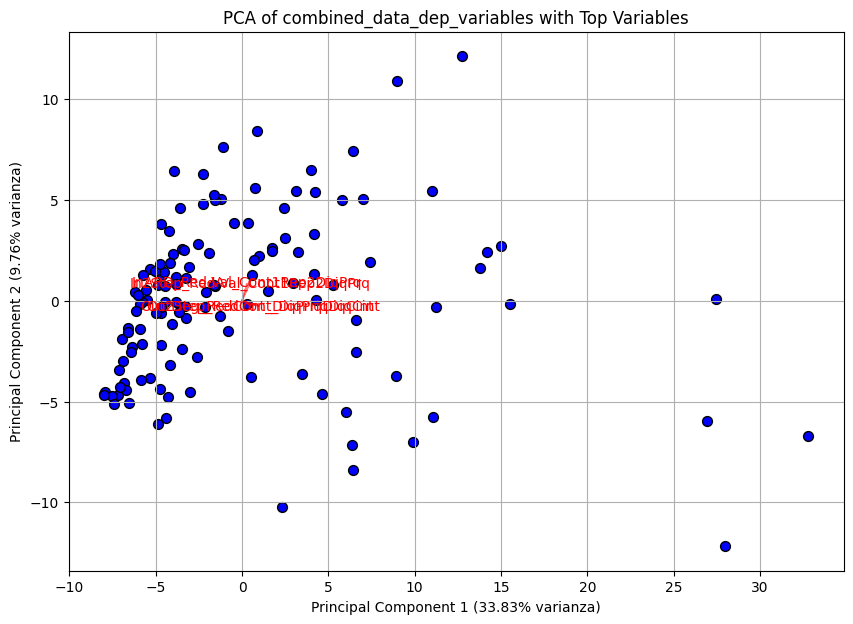

In [63]:
# Agrupar por 'id' y calcular la media (si es necesario)
data_frame_combinado_dep_grouped = data_frame_combinado.groupby('id').mean().reset_index().dropna()

# Eliminar la columna 'id' para realizar el PCA
data_for_pca = data_frame_combinado_dep_grouped.drop(columns=['id'])

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_pca)

# Realizar el PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

# Crear un DataFrame con los componentes principales
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['id'] = data_frame_combinado_dep_grouped['id']

# Calcular la contribución de cada variable a los componentes principales
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Crear un DataFrame con los loadings
loading_df = pd.DataFrame(loadings, index=data_for_pca.columns, columns=['PC1', 'PC2'])

# Seleccionar las variables más relevantes (por ejemplo, las 5 con mayor contribución en PC1 y PC2). OJO: si quiere explorar más debes cambiar este valor. 
top_n = 2
top_vars_PC1 = loading_df['PC1'].abs().nlargest(top_n).index
top_vars_PC2 = loading_df['PC2'].abs().nlargest(top_n).index
top_vars = set(top_vars_PC1).union(set(top_vars_PC2))

# Graficar los componentes principales
plt.figure(figsize=(10, 7))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c='blue', edgecolor='k', s=50)

explained_var_ratio = pca.explained_variance_ratio_



# Añadir las líneas y etiquetas para las variables más relevantes
for var in top_vars:
    plt.arrow(0, 0, loading_df.loc[var, 'PC1'], loading_df.loc[var, 'PC2'], 
              color='red', alpha=0.5, head_width=0.05)
    plt.text(loading_df.loc[var, 'PC1'] * 1.15, loading_df.loc[var, 'PC2'] * 1.15, 
             var, color='red', ha='center', va='center')

plt.title('PCA of combined_data_dep_variables with Top Variables')
plt.xlabel(f'Principal Component 1 ({explained_var_ratio[0]*100:.2f}% varianza)')
plt.ylabel(f'Principal Component 2 ({explained_var_ratio[1]*100:.2f}% varianza)')
plt.grid(True)
plt.show()

In [64]:
data_frame_combinado_dep_grouped.head()

,id,Degree_Rede_EntreajudaLabur,BetaCent_Rede_EntreajudaLabur,2Step_Rede_EntreajudaLabur,ARD_Rede_EntreajudaLabur,Closeness_Rede_EntreajudaLabur,Eigenvector_Rede_EntreajudaLabur,Between_Rede_EntreajudaLabur,2StepBet_Rede_EntreajudaLabur,Frag_Rede_EntreajudaLabur,...,OutARD_Var.Dep_RedePartilhaAgu,InARD_Var.Dep_RedePartilhaAgu,OutClose_Var.Dep_RedePartilhaAgu,InClose_Var.Dep_RedePartilhaAgu,Between_Var.Dep_RedePartilhaAgu,2StepBet_Var.Dep_RedePartilhaAgu,Frag_Var.Dep_RedePartilhaAgu,DwFrag_Var.Dep_RedePartilhaAgu,Ha_Total_Superf_NumZonas,N_Zonas_Superf_NumZonas
0,Aiace Quior,7.0,0.016946,7.0,7.0,251.0,0.000000,0.0,0.0,-0.000401,...,1.5,0.0,511.0,516.0,0.0,0.0,0.000050,0.000029,2.3644,7.0
1,Alamada Bia,2.0,0.003419,2.0,2.0,256.0,0.000000,0.0,0.0,-0.001006,...,0.0,0.0,516.0,516.0,0.0,0.0,-0.000071,-0.000061,0.5087,1.0
2,Alanghate Mfumba,10.0,0.032262,10.0,10.0,248.0,0.000000,0.0,0.0,-0.000037,...,0.0,0.0,516.0,516.0,0.0,0.0,-0.000071,-0.000061,1.4640,4.0
3,Albat Calabus,10.0,0.032262,10.0,10.0,248.0,0.000000,0.0,0.0,-0.000037,...,0.0,0.0,516.0,516.0,0.0,0.0,-0.000071,-0.000061,1.5186,2.0
4,Americano Mbunde,19.0,29.068657,19.0,19.0,239.0,0.223607,0.0,0.0,0.001053,...,0.0,0.0,516.0,516.0,0.0,0.0,-0.000071,-0.000061,0.2500,1.0


In [65]:
print(top_vars)

{'Out2Step_RedCont_DiqPriqDiqCint', 'OutDeg_RedCont_DiqPriqDiqCint', 'InARD_Red-Val_Cont1Rep2DiqPrq', 'In2Step_Red-Val_Cont1Rep2DiqPrq'}


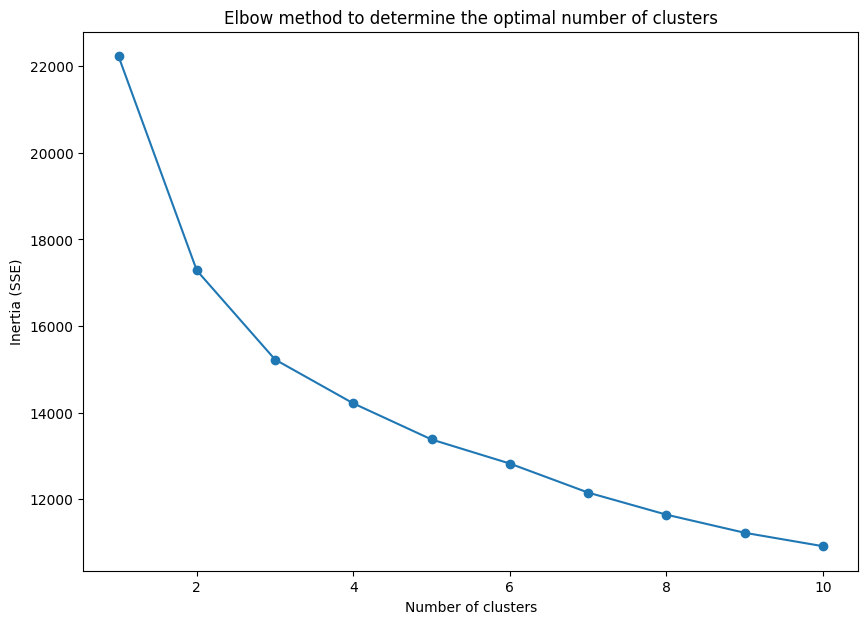

In [66]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Eliminar la columna 'id'
data_for_clustering = data_frame_combinado_dep_grouped.drop(columns=['id']).dropna()

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# Determinar el número óptimo de clústeres usando el método del codo
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 7))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow method to determine the optimal number of clusters')
plt.show()


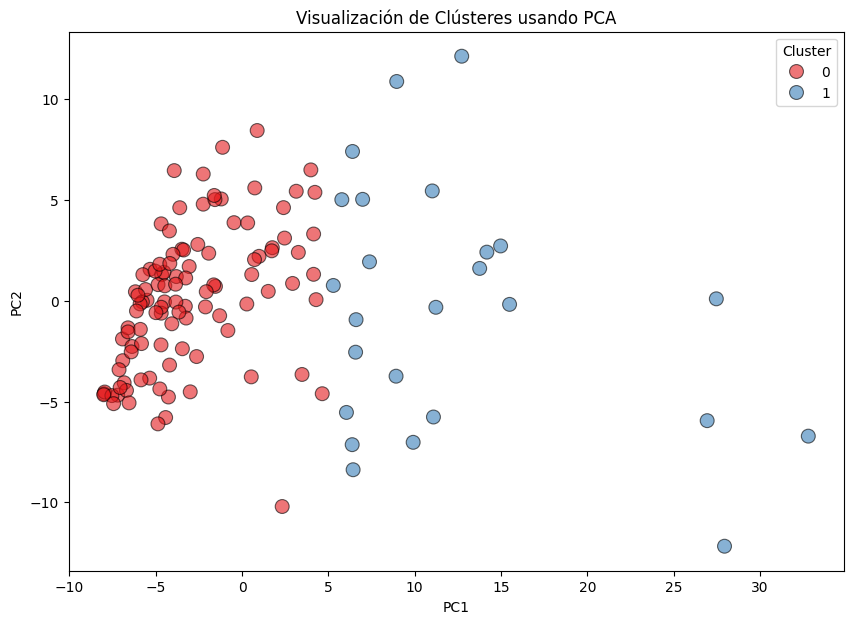

In [67]:
# Aplicar K-Means con el número óptimo de clústeres (elegir k basado en el gráfico del codo)
optimal_k = 2  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_frame_combinado_dep_grouped['Cluster'] = kmeans.fit_predict(data_scaled)

# Contar el número de elementos en cada clúster
cluster_counts = data_frame_combinado_dep_grouped['Cluster'].value_counts()

# Definir un umbral para los clústeres pequeños (por ejemplo, menos de 5 elementos)
threshold = 10
small_clusters = cluster_counts[cluster_counts < threshold].index

# Fusionar los clústeres pequeños en un clúster "otros"
data_frame_combinado_dep_grouped['Cluster'] = data_frame_combinado_dep_grouped['Cluster'].apply(lambda x: 'Otros' if x in small_clusters else x)

# Reducir la dimensionalidad a 2D para visualización
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['Cluster'] = data_frame_combinado_dep_grouped['Cluster']

# Graficar los clústeres
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='Set1', data=principal_df, s=100, alpha=0.6, edgecolor='k')
plt.title('Visualización de Clústeres usando PCA')
plt.show()

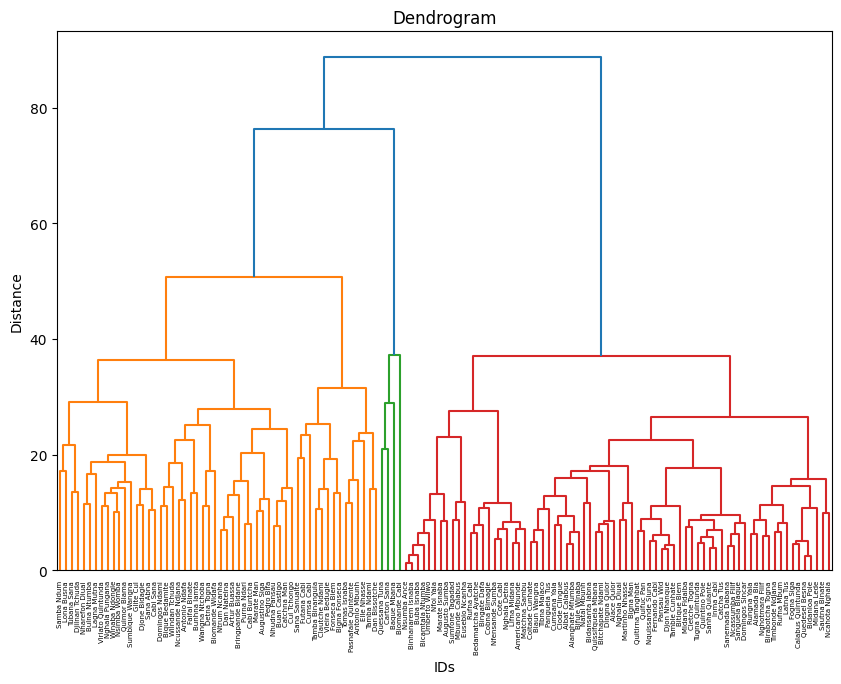

In [68]:
from scipy.cluster.hierarchy import dendrogram, linkage
# Calcular el enlace para el dendrograma
linked = linkage(data_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=data_frame_combinado_dep_grouped['id'].values, distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram')
plt.xlabel('IDs')
plt.ylabel('Distance')
plt.show()

## Exploratory analysis of independen data

In [5]:
data_frame_combinado_indep = pd.read_csv('../DataIntermediate/combined_data_indep_variables.csv', sep = ',')

data_frame_combinado_indep.head()

,id,OutDeg_Var.Expl_RedConfliAguaTot,Indeg_Var.Expl_RedConfliAguaTot,Out2local_Var.Expl_RedConfliAguaTot,In2local_Var.Expl_RedConfliAguaTot,OutBetaCent_Var.Expl_RedConfliAguaTot,InBetaCent_Var.Expl_RedConfliAguaTot,Out2Step_Var.Expl_RedConfliAguaTot,In2Step_Var.Expl_RedConfliAguaTot,OutARD_Var.Expl_RedConfliAguaTot,...,Out2Step_Var.Explic_RedeEmprestParcel,In2Step_Var.Explic_RedeEmprestParcel,OutARD_Var.Explic_RedeEmprestParcel,InARD_Var.Explic_RedeEmprestParcel,OutClose_Var.Explic_RedeEmprestParcel,InClose_Var.Explic_RedeEmprestParcel,Between_Var.Explic_RedeEmprestParcel,2StepBet_Var.Explic_RedeEmprestParcel,Frag_Var.Explic_RedeEmprestParcel,DwFrag_Var.Explic_RedeEmprestParcel
0,Aiace Quior,0,0,0,0,0.0,0.0,0,0,0.0,...,0,0,0.0,0.0,516,516,0,0,-0.000038,-0.000036
1,Alamada Bia,0,0,0,0,0.0,0.0,0,0,0.0,...,0,0,0.0,0.0,516,516,0,0,-0.000038,-0.000036
2,Alanghate Mfumba,0,0,0,0,0.0,0.0,0,0,0.0,...,0,0,0.0,0.0,516,516,0,0,-0.000038,-0.000036
3,Albat Calabus,0,0,0,0,0.0,0.0,0,0,0.0,...,0,0,0.0,0.0,516,516,0,0,-0.000038,-0.000036
4,Americano Mbunde,0,0,0,0,0.0,0.0,0,0,0.0,...,0,0,0.0,0.0,516,516,0,0,-0.000038,-0.000036


In [6]:
# Agrupar por 'id' y calcular la media (si es necesario)
data_frame_combinado_indep_grouped = data_frame_combinado_indep.groupby('id').mean().reset_index()

# Eliminar la columna 'id' para realizar el PCA
data_for_pca = data_frame_combinado_indep_grouped.drop(columns=['id'])


data_frame_combinado_indep_grouped.head()

,id,OutDeg_Var.Expl_RedConfliAguaTot,Indeg_Var.Expl_RedConfliAguaTot,Out2local_Var.Expl_RedConfliAguaTot,In2local_Var.Expl_RedConfliAguaTot,OutBetaCent_Var.Expl_RedConfliAguaTot,InBetaCent_Var.Expl_RedConfliAguaTot,Out2Step_Var.Expl_RedConfliAguaTot,In2Step_Var.Expl_RedConfliAguaTot,OutARD_Var.Expl_RedConfliAguaTot,...,Out2Step_Var.Explic_RedeEmprestParcel,In2Step_Var.Explic_RedeEmprestParcel,OutARD_Var.Explic_RedeEmprestParcel,InARD_Var.Explic_RedeEmprestParcel,OutClose_Var.Explic_RedeEmprestParcel,InClose_Var.Explic_RedeEmprestParcel,Between_Var.Explic_RedeEmprestParcel,2StepBet_Var.Explic_RedeEmprestParcel,Frag_Var.Explic_RedeEmprestParcel,DwFrag_Var.Explic_RedeEmprestParcel
0,Aiace Quior,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,516.0,516.0,0.0,0.0,-0.000038,-0.000036
1,Alamada Bia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,516.0,516.0,0.0,0.0,-0.000038,-0.000036
2,Alanghate Mfumba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,516.0,516.0,0.0,0.0,-0.000038,-0.000036
3,Albat Calabus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,516.0,516.0,0.0,0.0,-0.000038,-0.000036
4,Americano Mbunde,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,516.0,516.0,0.0,0.0,-0.000038,-0.000036


        PC1       PC2                id
0 -2.065889  3.577284       Aiace Quior
1 -4.017326 -2.862902       Alamada Bia
2 -4.085070 -2.998400  Alanghate Mfumba
3 -2.685130 -1.021069     Albat Calabus
4 -4.763018 -5.002499  Americano Mbunde


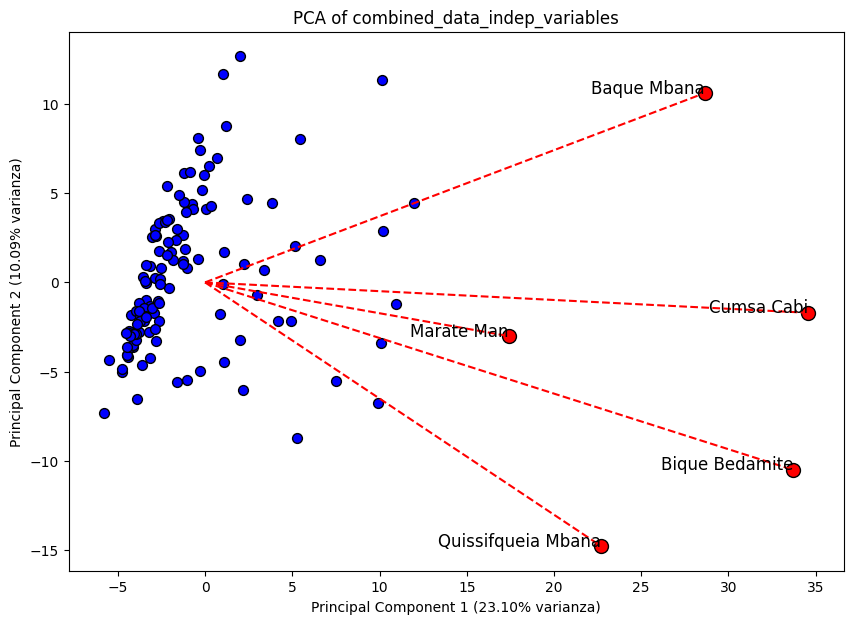

In [ ]:

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_pca)

# Realizar el PCA
pca = PCA(n_components=2)  
principal_components = pca.fit_transform(data_scaled)

# Crear un DataFrame con los componentes principales
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['id'] = data_frame_combinado_indep_grouped['id']

# Mostrar las primeras filas del DataFrame de componentes principales
print(principal_df.head())

# Seleccionar los IDs más relevantes (por ejemplo, los 5 valores absolutos más altos de PC1). OJO: si quiere explorar más debes cambiar este valor. 
top_n = 5
top_ids = principal_df.nlargest(top_n, 'PC1')['id']

# Graficar los componentes principales
plt.figure(figsize=(10, 7))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c='blue', edgecolor='k', s=50)
explained_var_ratio = pca.explained_variance_ratio_


# Añadir las líneas y etiquetas para los IDs más relevantes
for i in range(len(principal_df)):
    if principal_df.loc[i, 'id'] in top_ids.values:
        plt.scatter(principal_df.loc[i, 'PC1'], principal_df.loc[i, 'PC2'], c='red', edgecolor='k', s=100)
        plt.text(principal_df.loc[i, 'PC1'], principal_df.loc[i, 'PC2'], principal_df.loc[i, 'id'], fontsize=12, ha='right')
        plt.plot([0, principal_df.loc[i, 'PC1']], [0, principal_df.loc[i, 'PC2']], 'r--')

plt.title('PCA of combined_data_indep_variables')
plt.xlabel(f'Principal Component 1 ({explained_var_ratio[0]*100:.2f}% varianza)')
plt.ylabel(f'Principal Component 2 ({explained_var_ratio[1]*100:.2f}% varianza)')

plt.grid(False)
plt.show()

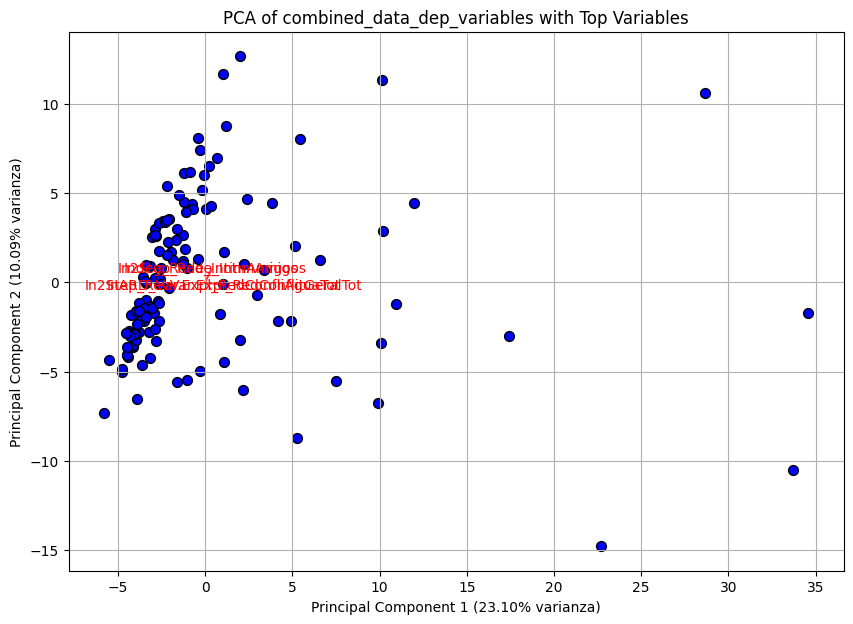

In [ ]:
# Crear un DataFrame con los componentes principales
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['id'] = data_frame_combinado_indep_grouped['id']

# Calcular la contribución de cada variable a los componentes principales
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Crear un DataFrame con los loadings
loading_df = pd.DataFrame(loadings, index=data_for_pca.columns, columns=['PC1', 'PC2'])

# Seleccionar las variables más relevantes (por ejemplo, las 5 con mayor contribución en PC1 y PC2)
top_n = 2
top_vars_PC1 = loading_df['PC1'].abs().nlargest(top_n).index
top_vars_PC2 = loading_df['PC2'].abs().nlargest(top_n).index
top_vars = set(top_vars_PC1).union(set(top_vars_PC2))

# Graficar los componentes principales
plt.figure(figsize=(10, 7))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c='blue', edgecolor='k', s=50)

# Añadir las líneas y etiquetas para las variables más relevantes
for var in top_vars:
    plt.arrow(0, 0, loading_df.loc[var, 'PC1'], loading_df.loc[var, 'PC2'], 
              color='red', alpha=0.5, head_width=0.05)
    plt.text(loading_df.loc[var, 'PC1'] * 1.15, loading_df.loc[var, 'PC2'] * 1.15, 
             var, color='red', ha='center', va='center')

plt.title('PCA of combined_data_dep_variables with Top Variables')
plt.xlabel(f'Principal Component 1 ({explained_var_ratio[0]*100:.2f}% varianza)')
plt.ylabel(f'Principal Component 2 ({explained_var_ratio[1]*100:.2f}% varianza)')
plt.grid(True)
plt.show()

In [ ]:
print(top_vars)

{'Indeg_Rede_IntimAmigos', 'In2Step_Rede_IntimAmigos', 'In2Step_RevVar.Expl_RedConflitGeralTot', 'InARD_Var.Expl_RedConfliAguaTot'}


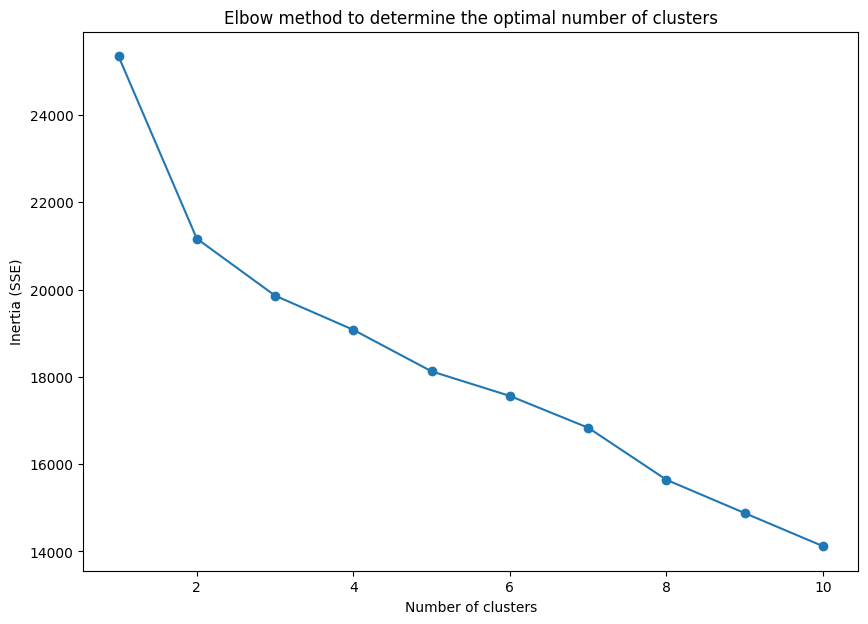

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Eliminar la columna 'id'
data_for_clustering = data_frame_combinado_indep_grouped.drop(columns=['id'])

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# Determinar el número óptimo de clústeres usando el método del codo
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 7))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow method to determine the optimal number of clusters')
plt.show()



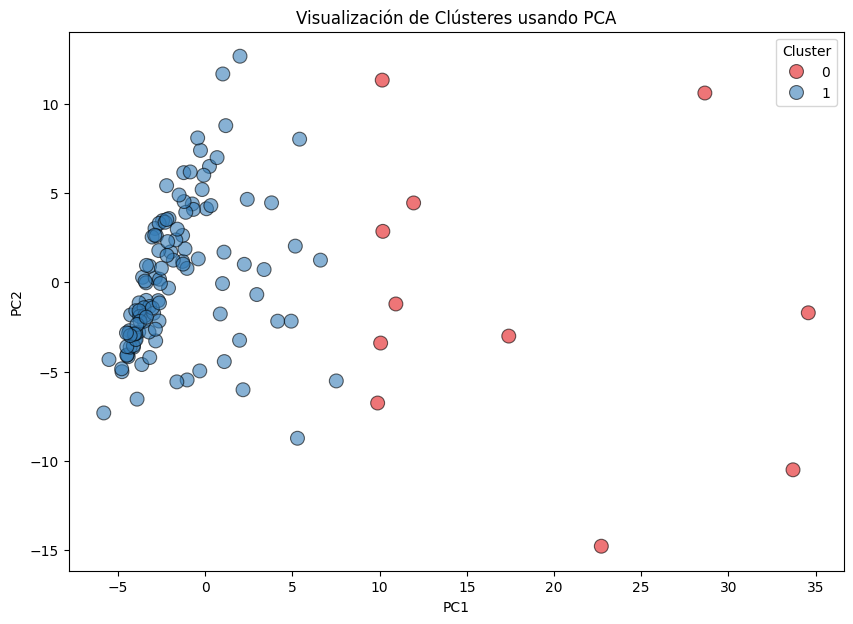

In [ ]:
# Aplicar K-Means con el número óptimo de clústeres (elegir k basado en el gráfico del codo)
optimal_k = 2  # Reemplaza este valor con el número óptimo que determines del gráfico del codo
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_frame_combinado_indep_grouped['Cluster'] = kmeans.fit_predict(data_scaled)

# Contar el número de elementos en cada clúster
cluster_counts = data_frame_combinado_indep_grouped['Cluster'].value_counts()

# Definir un umbral para los clústeres pequeños (por ejemplo, menos de 5 elementos)
threshold = 5
small_clusters = cluster_counts[cluster_counts < threshold].index

# Fusionar los clústeres pequeños en un clúster "otros"
data_frame_combinado_indep_grouped['Cluster'] = data_frame_combinado_indep_grouped['Cluster'].apply(lambda x: 'Otros' if x in small_clusters else x)

# Reducir la dimensionalidad a 2D para visualización
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['Cluster'] = data_frame_combinado_indep_grouped['Cluster']

# Graficar los clústeres
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='Set1', data=principal_df, s=100, alpha=0.6, edgecolor='k')
plt.title('Visualización de Clústeres usando PCA')
plt.show()

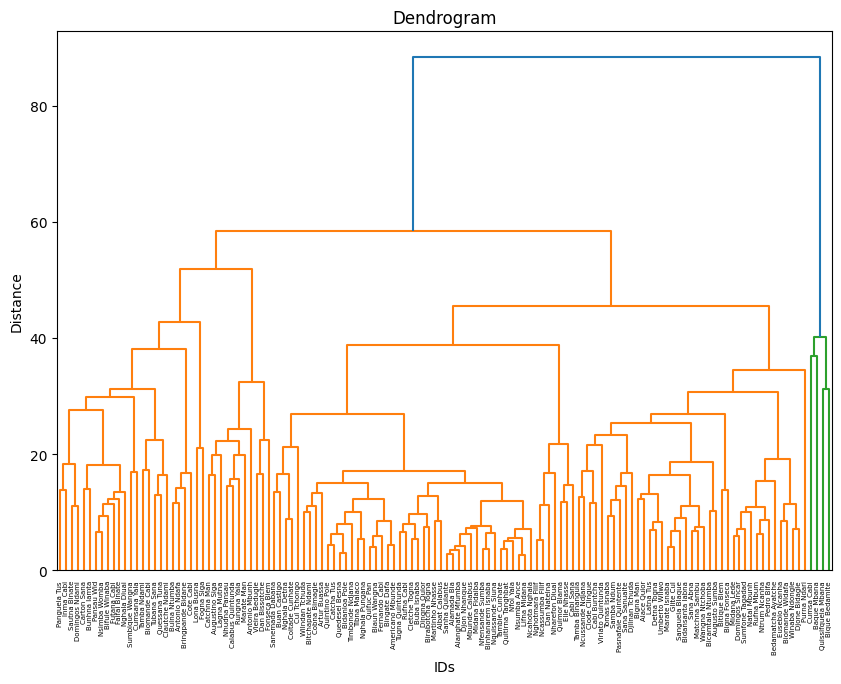

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
# Calcular el enlace para el dendrograma
linked = linkage(data_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=data_frame_combinado_indep_grouped['id'].values, distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram')
plt.xlabel('IDs')
plt.ylabel('Distance')
plt.show()

## PCA with all data

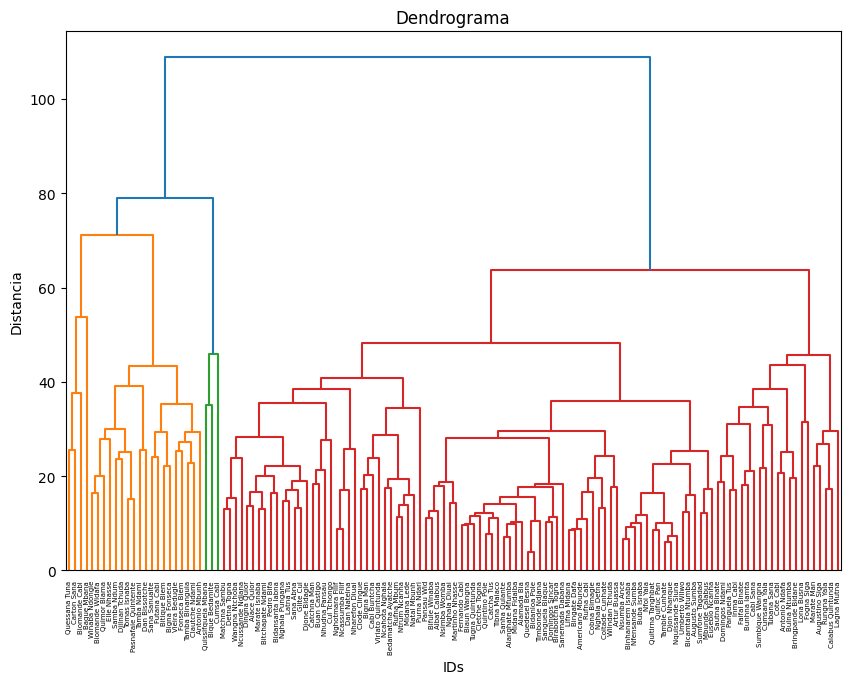

In [69]:
# Combinar los DataFrames utilizando la columna 'id'
combined_df = pd.merge(data_frame_combinado_indep, data_frame_combinado, on='id')

# Paso 2: Normalizar los Datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(combined_df.drop(columns=['id']))

# Paso 3: Clustering y Dendrograma
linked = linkage(data_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=combined_df['id'].values, distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma')
plt.xlabel('IDs')
plt.ylabel('Distancia')
plt.show()



In [70]:
# PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['id'] = combined_df['id']

# Mostrar la contribución de cada componente principal
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

# Paso 5: Identificación de Variables Relevantes
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
num_vars = 5  # Número de variables más relevantes a mostrar
for i, (pc1, pc2) in enumerate(zip(loadings[:, 0], loadings[:, 1])):
    print(f'Variable: {combined_df.columns[i]}, PC1: {pc1:.2f}, PC2: {pc2:.2f}')


Explained Variance Ratio: [0.22005469 0.10160081]
Variable: id, PC1: 0.51, PC2: 0.74
Variable: OutDeg_Var.Expl_RedConfliAguaTot, PC1: 0.52, PC2: 0.75
Variable: Indeg_Var.Expl_RedConfliAguaTot, PC1: 0.53, PC2: 0.76
Variable: Out2local_Var.Expl_RedConfliAguaTot, PC1: 0.55, PC2: 0.74
Variable: In2local_Var.Expl_RedConfliAguaTot, PC1: 0.51, PC2: 0.74
Variable: OutBetaCent_Var.Expl_RedConfliAguaTot, PC1: 0.52, PC2: 0.75
Variable: InBetaCent_Var.Expl_RedConfliAguaTot, PC1: 0.51, PC2: 0.74
Variable: Out2Step_Var.Expl_RedConfliAguaTot, PC1: 0.54, PC2: 0.74
Variable: In2Step_Var.Expl_RedConfliAguaTot, PC1: 0.50, PC2: 0.78
Variable: OutARD_Var.Expl_RedConfliAguaTot, PC1: 0.54, PC2: 0.78
Variable: InARD_Var.Expl_RedConfliAguaTot, PC1: -0.48, PC2: -0.76
Variable: OutClose_Var.Expl_RedConfliAguaTot, PC1: -0.53, PC2: -0.76
Variable: InClose_Var.Expl_RedConfliAguaTot, PC1: 0.42, PC2: 0.69
Variable: Between_Var.Expl_RedConfliAguaTot, PC1: 0.35, PC2: 0.57
Variable: 2StepBet_Var.Expl_RedConfliAguaTot, P

Variables más relevantes: Index(['InBetaCent_RedCont_DiqPriqDiqCint', 'In2local_Red-Val_Cont1Rep2DiqPrq'], dtype='object')


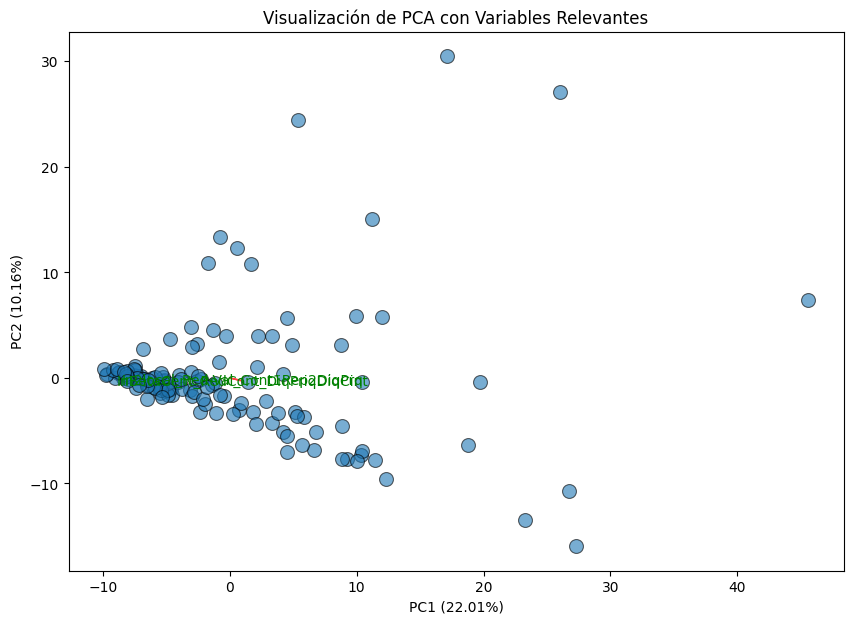

In [71]:
# Identificación de Variables Relevantes
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
num_vars = 2  # Número de variables más relevantes a mostrar

# Identificar las variables más relevantes
most_relevant_vars_indices = np.argsort(-np.abs(loadings[:, 0]))[:num_vars]
most_relevant_vars = combined_df.columns[most_relevant_vars_indices]
print("Variables más relevantes:", most_relevant_vars)

# Paso 6: Graficar PCA con las líneas de las variables más relevantes
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', data=principal_df, s=100, alpha=0.6, edgecolor='k')

# Añadir líneas de las variables más relevantes
for i in most_relevant_vars_indices:
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='r', alpha=0.5)
    plt.text(loadings[i, 0] * 1.15, loadings[i, 1] * 1.15, combined_df.columns[i], color='g', ha='center', va='center')

plt.title('Visualización de PCA con Variables Relevantes')
plt.xlabel(f'PC1 ({explained_variance[0]*100:.2f}%)')
plt.ylabel(f'PC2 ({explained_variance[1]*100:.2f}%)')
plt.grid(visible=False)
plt.show()

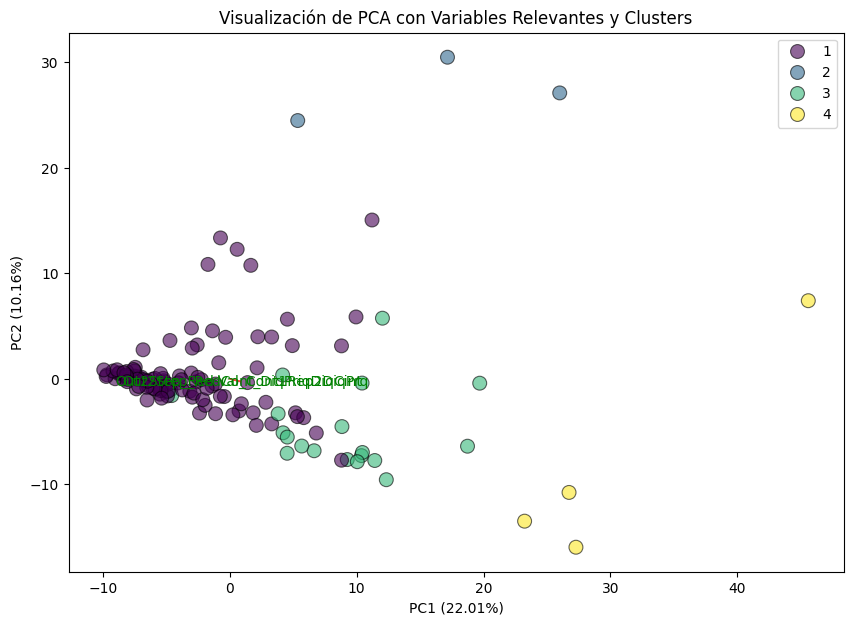

In [72]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Filtrar solo las columnas numéricas, excluyendo 'id'
numeric_df = combined_df.drop(columns=['id']).select_dtypes(include=[float, int]).copy()

# Estandarizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)
# Clustering jerárquico
distance_matrix = pdist(scaled_data, metric='euclidean')
linked = linkage(distance_matrix, method='ward')
# Obtener los clusters
clusters = fcluster(linked, t=4, criterion='maxclust')  # Ajustar t según el número deseado de clusters

# Añadir los clusters al DataFrame principal
principal_df['Cluster'] = clusters

# Graficar PCA con las líneas de las variables más relevantes y los clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=principal_df, s=100, alpha=0.6, edgecolor='k', palette='viridis')

# Añadir líneas de las variables más relevantes
for i in most_relevant_vars_indices:
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='r', alpha=0.5)
    plt.text(loadings[i, 0] * 1.15, loadings[i, 1] * 1.15, numeric_df.columns[i], color='g', ha='center', va='center')

plt.title('Visualización de PCA con Variables Relevantes y Clusters')
plt.xlabel(f'PC1 ({explained_variance[0]*100:.2f}%)')
plt.ylabel(f'PC2 ({explained_variance[1]*100:.2f}%)')
plt.grid(visible=False)
plt.legend()
plt.show()

## Plots de las variables dependientes

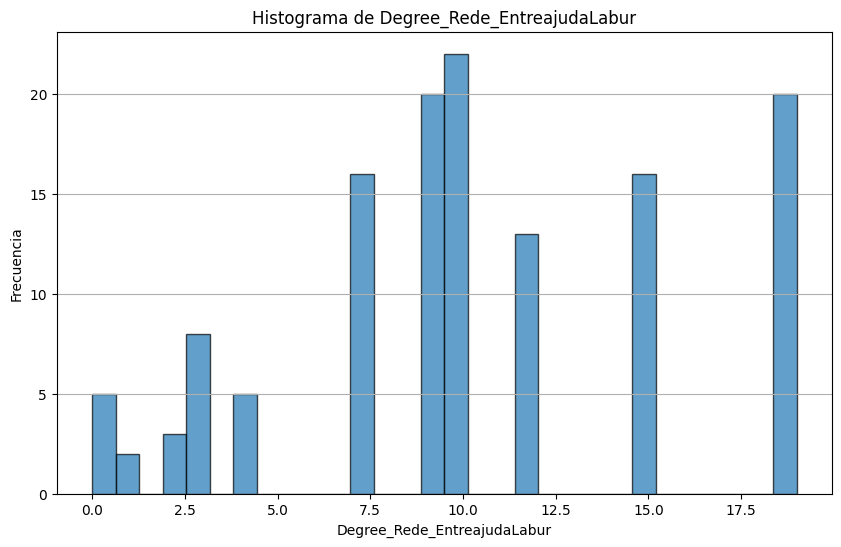

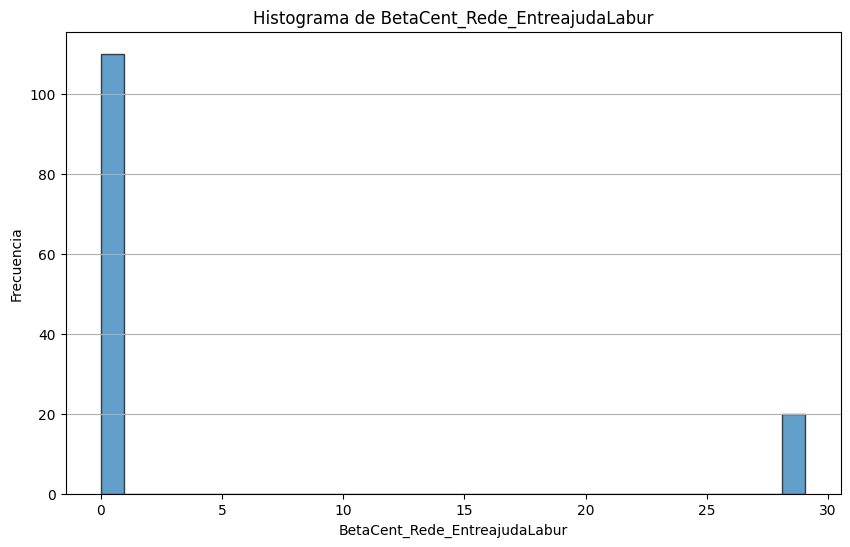

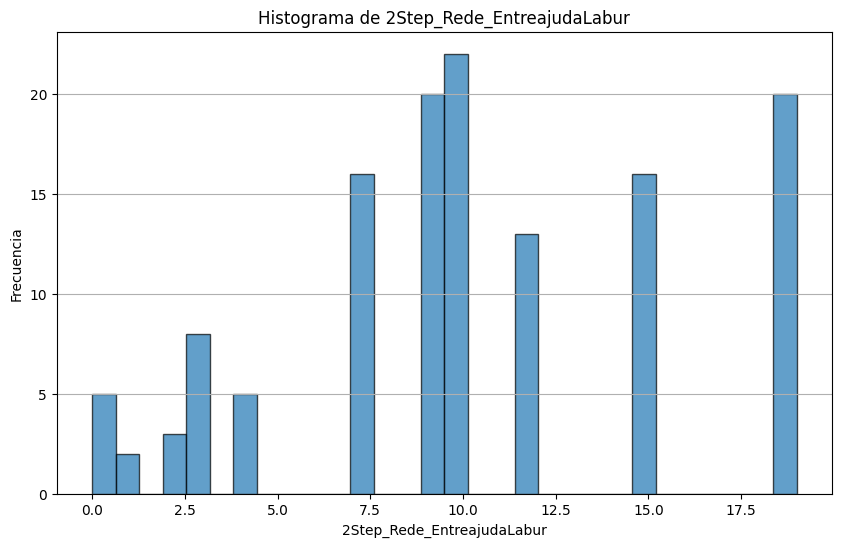

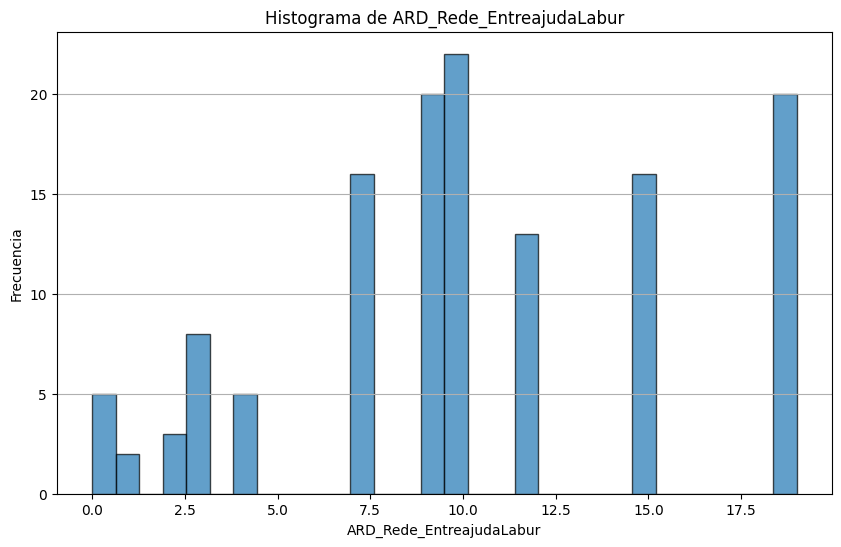

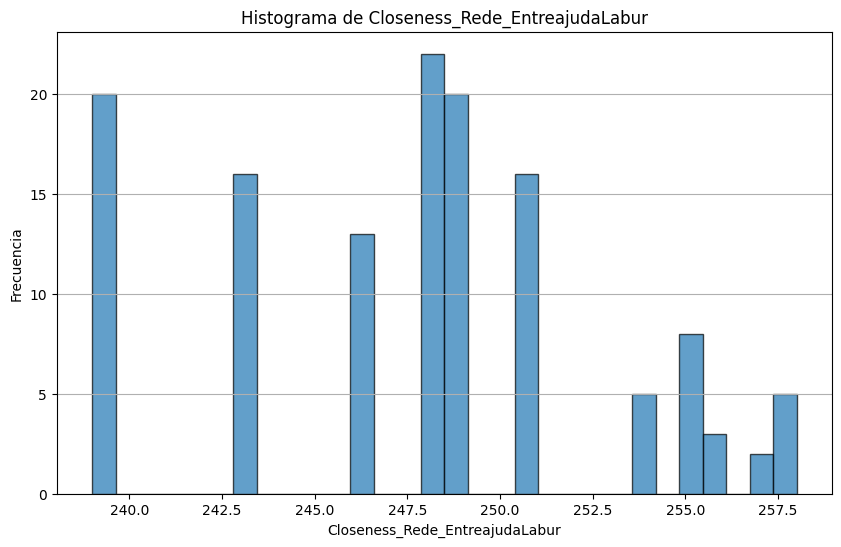

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Excluir la columna 'id'
dep_vars_df = data_frame_combinado.drop(columns=['id'])

# Seleccionar la cantidad de variables que deseas plotear
num_plots = 5  # Hermano, acá debe elegir cuántos plots quiere. Debe tener cuidado si pone muchos, se plotean todos. 

# Crear histogramas para cada variable dependiente seleccionada y guardarlos
selected_columns = dep_vars_df.columns[:num_plots]

for col in selected_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(dep_vars_df[col].dropna(), bins=30, alpha=0.7, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuency')
    plt.grid(axis='y')
    # plt.savefig(f'../DataIntermediate/histogram_{col}.png') # Si quiere guardar el plot, borra el primer # de esta fila.
    plt.show()


## Plots de las variables independientes

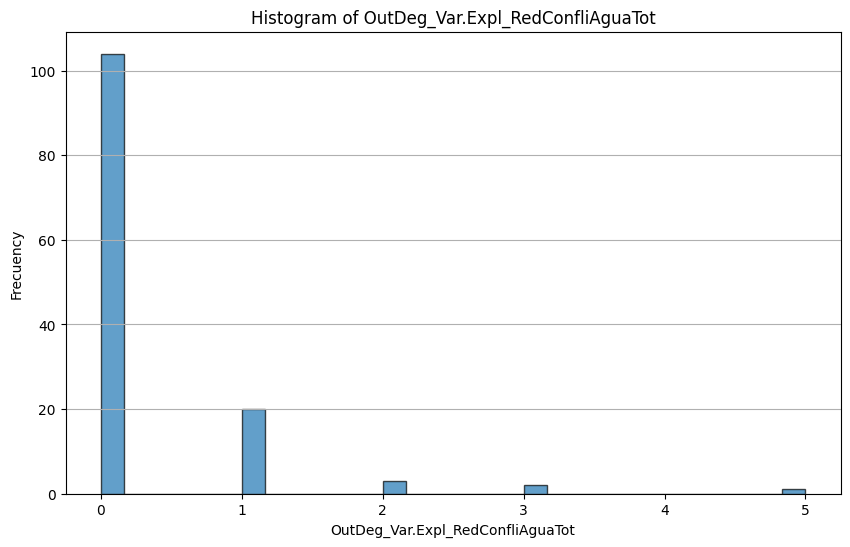

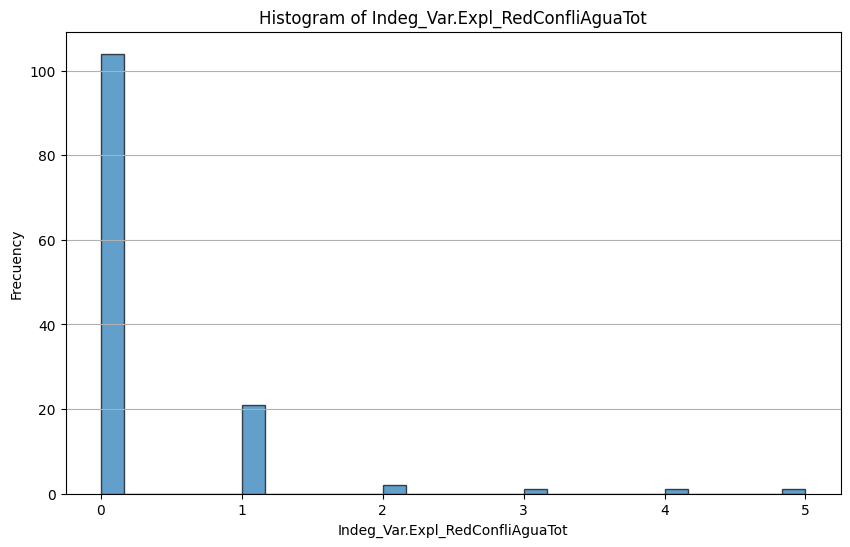

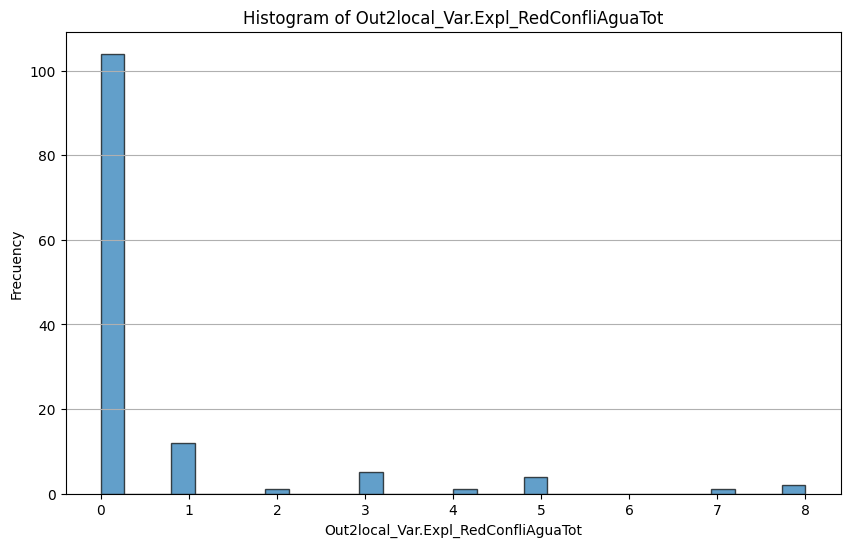

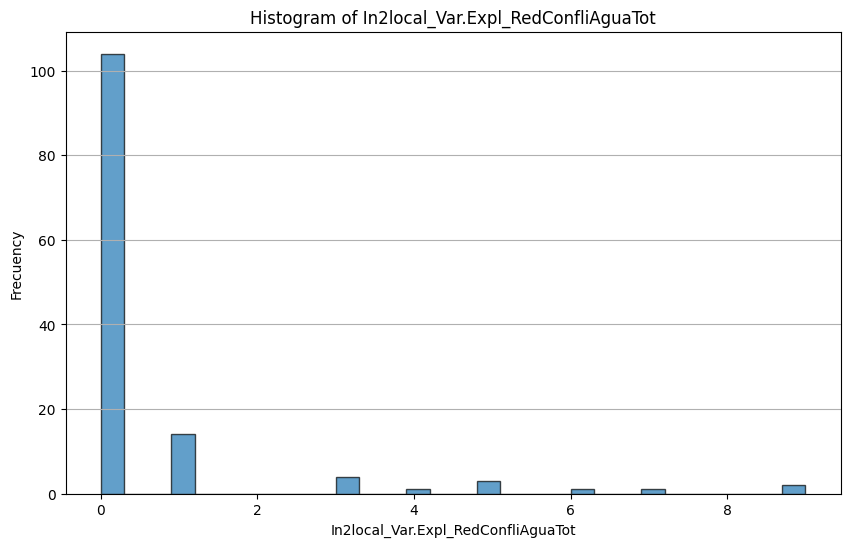

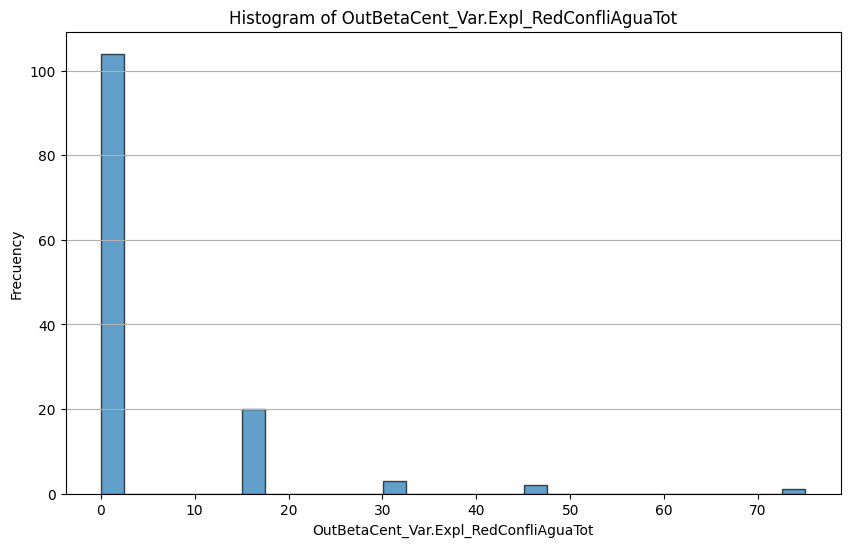

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Excluir la columna 'id'
dep_vars_df_indep = data_frame_combinado_indep.drop(columns=['id'])

# Seleccionar la cantidad de variables que deseas plotear
num_plots = 5  # Hermano, acá debe elegir cuántos plots quiere. Debe tener cuidado si pone muchos, se plotean todos. 

# Crear histogramas para cada variable dependiente seleccionada y guardarlos
selected_columns = dep_vars_df_indep.columns[:num_plots]

for col in selected_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(dep_vars_df_indep[col].dropna(), bins=30, alpha=0.7, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuency')
    plt.grid(axis='y')
    # plt.savefig(f'../DataIntermediate/histogram_{col}.png') # Si quiere guardar el plot, borra el primer # de esta fila.
    plt.show()
